# SWCON253 Machine Learning

# Linear Models for Regression

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
sklearn.set_config(print_changed_only=True)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

# Ames Housing Dataset

In [ ]:
ames = pd.read_excel("data/AmesHousing.xls")
# These seem to be crazy outliers
ames = ames.loc[ames['Gr Liv Area'] <= 4000]

In [ ]:
ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
#X_train, X_test, y_train, y_test = train_test_split(ames.drop('SalePrice', axis=1), ames.SalePrice, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(ames.drop(['SalePrice', 'Order', 'PID'], axis=1), ames.SalePrice, random_state=2)

In [ ]:
X_train.shape

(2193, 79)

In [ ]:
categorical = X_train.dtypes == object

In [ ]:
X_train_cont = X_train.loc[:, ~categorical]

In [ ]:
X_train_cont.shape

(2193, 36)

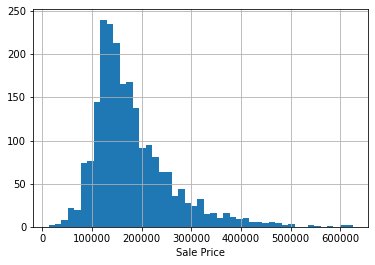

In [ ]:
y_train.hist(bins='auto')
plt.xlabel('Sale Price')
plt.savefig("images/ames_housing_price_hist.png")

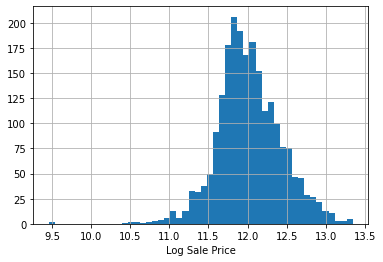

In [ ]:
np.log(y_train).hist(bins='auto')
plt.xlabel('Log Sale Price')
plt.savefig("images/ames_housing_price_hist_log.png")

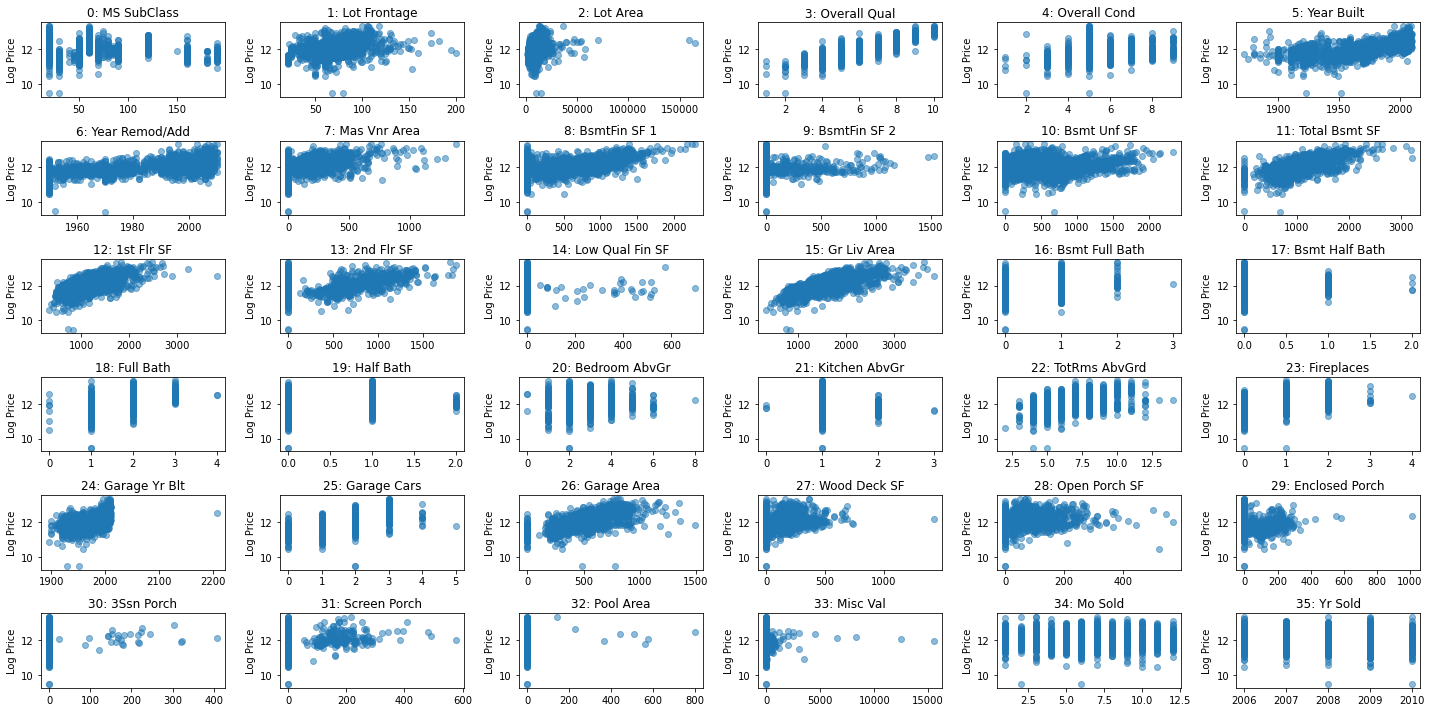

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):

    ax.plot(X_train_cont.iloc[:, i], np.log(y_train), 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, X_train_cont.columns[i]))
    ax.set_ylabel("Log Price")
plt.tight_layout()
plt.savefig("images/ames_housing_scatter.png")

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2193, 79)
(2193,)


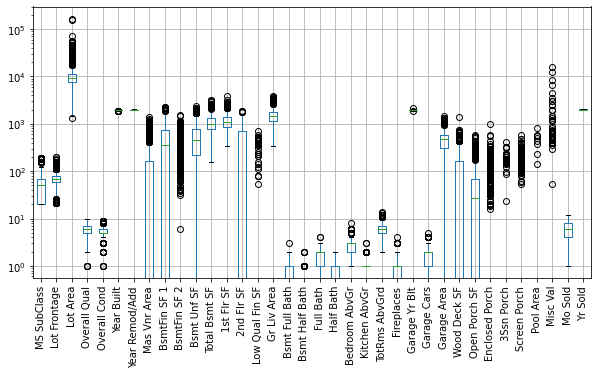

In [ ]:
plt.figure(figsize=(10, 5))
X_train_cont.boxplot(rot=90)
plt.yscale('log')
plt.savefig("images/ames_scaling.png")

# Preprocessing 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [ ]:
cat_preprocessing = make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'),
                                  OneHotEncoder(handle_unknown='ignore'))
cont_preprocessing = make_pipeline(SimpleImputer(), StandardScaler())
preprocess = make_column_transformer((cat_preprocessing, make_column_selector(dtype_include='object')),
                                      remainder=cont_preprocessing)

In [ ]:
preprocess

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001A18C9D9F70>)])

In [ ]:
cross_val_score(make_pipeline(preprocess, LinearRegression()), X_train, y_train, cv=5)

array([0.92814935, 0.92747341, 0.93216645, 0.89816012, 0.88373338])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(make_pipeline(preprocess, LinearRegression()), X_train, y_train, cv=5)

In [ ]:
from sklearn.compose import TransformedTargetRegressor
log_regressor = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
cross_val_score(make_pipeline(preprocess, log_regressor), X_train, y_train, cv=5)

array([0.9501602 , 0.94295648, 0.94061552, 0.91261568, 0.9224241 ])

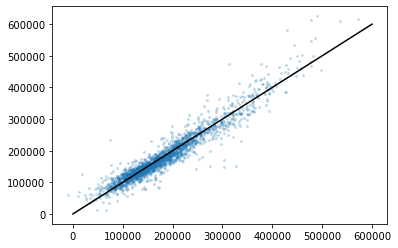

In [ ]:
plt.plot([0, 600000], [0, 600000], color='k')
plt.scatter(y_pred, y_train, alpha=.2, s=4)

In [ ]:
cross_val_score(make_pipeline(SimpleImputer(), TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)), X_train_cont, y_train, cv=5)

array([0.93059042, 0.91784071, 0.92288361, 0.90353902, 0.92181667])

In [ ]:
cross_val_score(make_pipeline(preprocess, TransformedTargetRegressor(Ridge(), func=np.log, inverse_func=np.exp)), X_train, y_train, cv=5)

array([0.94797495, 0.9497971 , 0.94162586, 0.91482078, 0.93109418])

In [ ]:
log_ridge = TransformedTargetRegressor(
    Ridge(), func=np.log, inverse_func=np.exp)
cross_val_score(make_pipeline(preprocess, log_ridge),
                X_train, y_train, cv=5)

array([0.94797495, 0.9497971 , 0.94162586, 0.91482078, 0.93109418])

In [ ]:
cross_val_score(make_pipeline(preprocess, TransformedTargetRegressor(Ridge(), func=np.log, inverse_func=np.exp)), X_train, y_train, cv=5)

array([0.94797495, 0.9497971 , 0.94162586, 0.91482078, 0.93109418])

In [ ]:
np.set_printoptions(suppress=True, precision=3)

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
pipe = Pipeline([('preprocessing', preprocess),
                 ('ridge', log_ridge)])
param_grid = {'ridge__regressor__alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(pipe, param_grid, cv=RepeatedKFold(10, 5),
                    return_train_score=True)
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_splits=10, n_repeats=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
             

In [ ]:
print(param_grid)

{'ridge__regressor__alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


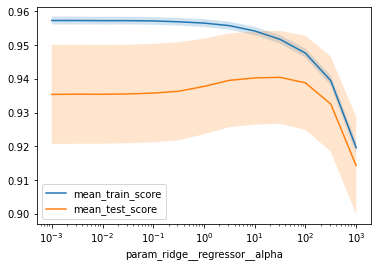

In [ ]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_ridge__regressor__alpha', 'mean_train_score')
results.plot('param_ridge__regressor__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_ridge__regressor__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_ridge__regressor__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.savefig("images/ridge_alpha_search.png")

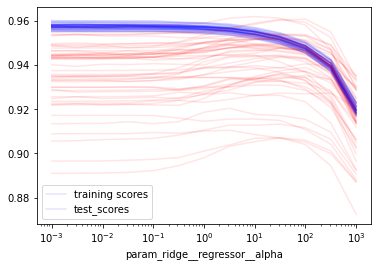

In [ ]:
a = results.plot(c='b', x='param_ridge__regressor__alpha', y=[f'split{i}_train_score' for i in range(50)], alpha=.1)
ax = plt.gca()
a = results.plot(c='r', x='param_ridge__regressor__alpha', y=[f'split{i}_test_score' for i in range(50)], alpha=.1, ax=ax)
plt.legend((ax.get_children()[0], ax.get_children()[10]), ('training scores', 'test_scores'))
plt.xscale("log")
plt.savefig("images/ridge_alpha_search_cv_runs.png")

In [ ]:
preprocess

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001A18C9D9F70>)])

In [ ]:
X_train_pre = preprocess.fit_transform(X_train, y_train)
log_regressor.fit(X_train_pre, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [ ]:
feature_names = np.hstack([X_train_cont.columns,  preprocess.named_transformers_['pipeline']['onehotencoder'].get_feature_names()])

In [ ]:
feature_names.shape

(310,)

In [ ]:
log_regressor.regressor_.coef_.max()

0.4563289260155398

In [ ]:
largest = np.abs(log_regressor.regressor_.coef_).argsort()[-10:]
largest

array([231, 212, 248, 247,   0, 136, 121, 105,  41, 147], dtype=int64)

# Triazine Dataset

In [ ]:
triazines = fetch_openml('triazines')

C:\Users\user\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name triazines exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


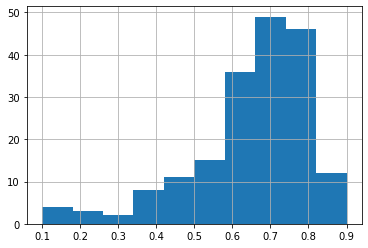

In [ ]:
pd.Series(triazines.target).hist()
plt.savefig('images/triazine_bar.png')

In [ ]:
triazines.data.shape

(186, 60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(triazines.data, triazines.target, random_state=0)

cross_val_score(LinearRegression(), X_train, y_train, cv=5)

array([-2.343e+25, -7.621e+22, -5.303e+23, -4.994e+23, -2.261e+23])

In [ ]:
cross_val_score(Ridge(), X_train, y_train, cv=5)

array([0.263, 0.455, 0.024, 0.23 , 0.036])

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline


param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=RepeatedKFold(10, 5),
                    return_train_score=True)
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_splits=10, n_repeats=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=Ridge(),
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

In [ ]:
cross_val_score(LinearRegression(), X_train, y_train, cv=5)

array([-2.343e+25, -7.621e+22, -5.303e+23, -4.994e+23, -2.261e+23])

In [ ]:
cross_val_score(Ridge(), X_train, y_train, cv=5)

array([0.263, 0.455, 0.024, 0.23 , 0.036])

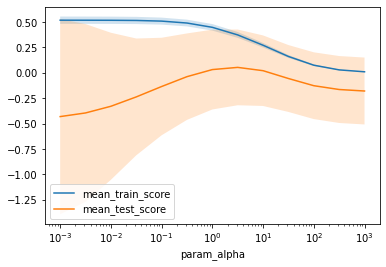

In [ ]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.savefig("images/ridge_alpha_triazine.png")

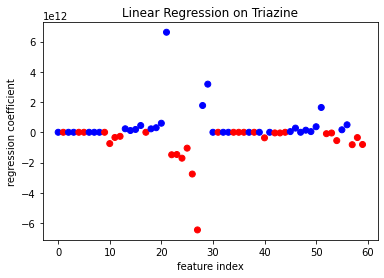

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap='bwr_r')
plt.xlabel('feature index')
plt.ylabel('regression coefficient')
plt.title("Linear Regression on Triazine")
plt.savefig("images/lr_coefficients_large.png")

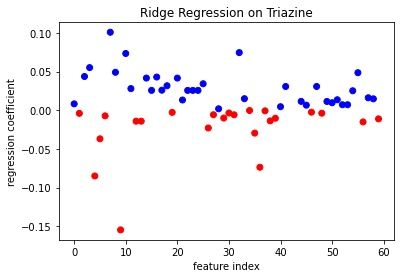

In [ ]:
ridge = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap='bwr_r')

plt.xlabel('feature index')
plt.ylabel('regression coefficient')
plt.title("Ridge Regression on Triazine")
plt.savefig("images/ridge_coefficients.png")

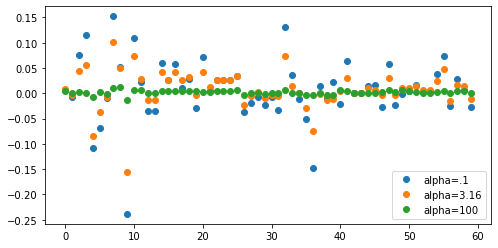

In [ ]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))
plt.plot(ridge1.coef_, 'o', label="alpha=.1")
plt.plot(ridge.coef_, 'o', label=f"alpha={ridge.alpha:.2f}")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()
plt.savefig("images/ridge_coefficients_alpha.png")

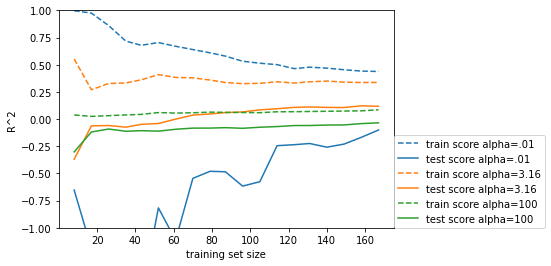

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, triazines.data, triazines.target, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=.01), "alpha=.01")
plot_learning_curve(Ridge(alpha=ridge.alpha), f"alpha={ridge.alpha:.2f}")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

#plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)
plt.savefig("images/ridge_learning_curve.png")

# Lasso Regression

In [ ]:
def nonzero(est, X, y):
    return np.sum(est.coef_ != 0)

param_grid = {'alpha': np.logspace(-5, 0, 10)}

grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=10, return_train_score=True,
                    scoring={'r2': 'r2', 'num_nonzero': nonzero}, refit='r2')
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022455180061029534, tolerance: 0.0002803990288
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([0.   , 0.   , 0.   , 0.   , 0.002, 0.006, 0.022, 0.077, 0.278,
       1.   ])},
             refit='r2', return_train_score=True,
             scoring={'num_nonzero': <function nonzero at 0x000001A18E62A9D0>,
                      'r2': 'r2'})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0016681005372000592}
0.018689026084080174


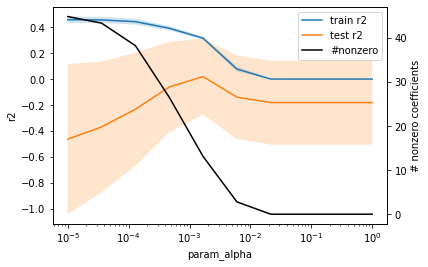

In [ ]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
a = results.plot('param_alpha', 'mean_train_r2', legend=False)
b = results.plot('param_alpha', 'mean_test_r2', ax=plt.gca(), legend=False)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_r2'] + results['std_train_r2'],
                 results['mean_train_r2'] - results['std_train_r2'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_r2'] + results['std_test_r2'],
                 results['mean_test_r2'] - results['std_test_r2'], alpha=0.2)
ax1 = plt.gca()
ax2 = ax1.twinx()
c = results.plot('param_alpha', 'mean_train_num_nonzero', ax=ax2, c='k', legend=False)
plt.legend(ax1.get_children()[2:4] + [c.get_children()[0]], ('train r2', 'test r2', '#nonzero'))
plt.xscale("log")
ax1.set_ylabel('r2')
ax2.set_ylabel('# nonzero coefficients')
plt.savefig("images/lasso_alpha_triazine.png")

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0016681005372000592}
0.018689026084080174


In [ ]:
grid.score(X_test, y_test)

0.23855889821782372

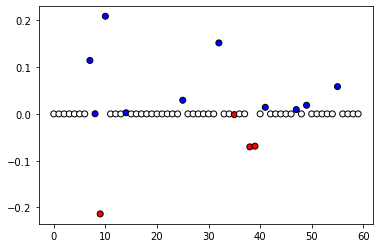

In [ ]:
lasso = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
plt.savefig("images/lasso_coefficients.png")

In [ ]:
print(X_train.shape)
np.sum(lasso.coef_ != 0)

(139, 60)


14

# Understanding L1 and L2 Penalties

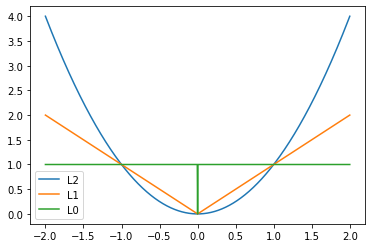

In [ ]:
line = np.linspace(-2, 2, 1001)
plt.plot(line, line ** 2, label="L2")
plt.plot(line, np.abs(line), label="L1")
plt.plot(line, line!=0, label="L0")
plt.legend()
plt.savefig("images/l2_l1_l0.png")

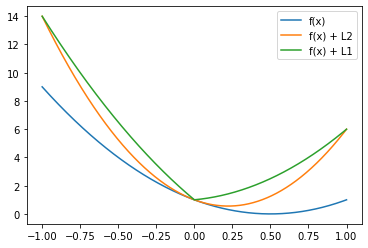

In [ ]:
line = np.linspace(-1, 1, 1001)

alpha_l1 = 5
alpha_l2 = 5

f_x = (2 * line - 1) ** 2
f_x_l2 =  f_x + alpha_l2 * line ** 2
f_x_l1 =  f_x + alpha_l1 * np.abs(line)

plt.plot(line, f_x, label="f(x)")
plt.plot(line, f_x_l2, label="f(x) + L2")
plt.plot(line, f_x_l1, label="f(x) + L1")
plt.legend()
plt.savefig("images/l1_kink.png")

# Lasso Regression with different hyperparameters

In [ ]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])}


In [ ]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000.0, normalize=True),
             iid=False,
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])},
             return_train_score=True)

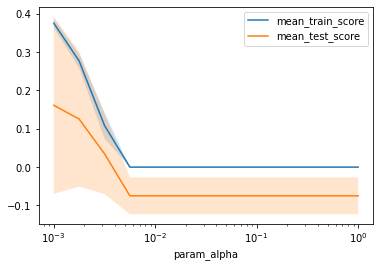

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/lasso_alpha_search.png")

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.98}
0.05327835296884513


In [ ]:
grid.score(X_test, y_test)

0.22924004472675907

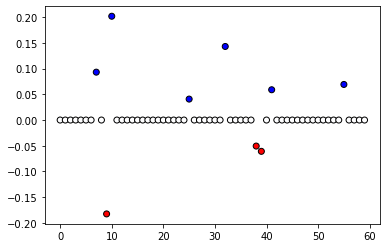

In [ ]:
lasso = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
plt.savefig("images/lasso_coefficients.png")

In [ ]:
print(X_train.shape)
np.sum(lasso.coef_ != 0)

(139, 60)


9

# Elastic-Net Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(triazines.data, triazines.target, random_state=42)

param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
print(param_grid)

{'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.8, 0.9, 0.95, 0.98, 1]}


In [ ]:
from sklearn.linear_model import ElasticNet
grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=RepeatedKFold(10, 10), return_train_score=True)
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_splits=10, n_repeats=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=None),
             estimator=ElasticNet(max_iter=1000000.0, normalize=True),
             param_grid={'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]),
                         'l1_ratio': [0.01, 0.1, 0.5, 0.8, 0.9, 0.95, 0.98, 1]},
             return_train_score=True)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.9}
0.07447657917312983


In [ ]:
grid.score(X_test, y_test)

0.230901021975095

In [ ]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_l1_ratio', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score',
       ...
       'split92_train_score', 'split93_train_score', 'split94_train_score',
       'split95_train_score', 'split96_train_score', 'split97_train_score',
       'split98_train_score', 'split99_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object', length=212)

In [ ]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
pd.set_option("display.precision", 3)
res = res.set_index(res.index.values.round(4))

In [ ]:
res

param_l1_ratio,0.01,0.10,0.50,0.80,0.90,0.95,0.98,1.00
1.000e-04,-0.284,-0.271,-0.229,-2.060e-01,-0.199,-0.196,-0.194,-0.193
2.000e-04,-0.210,-0.196,-0.147,-1.091e-01,-0.095,-0.089,-0.085,-0.083
5.000e-04,-0.138,-0.123,-0.055,-5.939e-04,0.014,0.021,0.024,0.026
1.000e-03,-0.071,-0.053,0.046,7.393e-02,0.074,0.073,0.072,0.071
2.200e-03,-0.017,0.006,0.053,-6.176e-03,-0.030,-0.043,-0.050,-0.056
4.600e-03,0.015,0.047,-0.083,-1.379e-01,-0.136,-0.136,-0.136,-0.136
1.000e-02,0.027,0.007,-0.136,-1.357e-01,-0.136,-0.136,-0.136,-0.136
2.150e-02,0.009,-0.101,-0.136,-1.357e-01,-0.136,-0.136,-0.136,-0.136
4.640e-02,-0.034,-0.136,-0.136,-1.357e-01,-0.136,-0.136,-0.136,-0.136
1.000e-01,-0.088,-0.136,-0.136,-1.357e-01,-0.136,-0.136,-0.136,-0.136


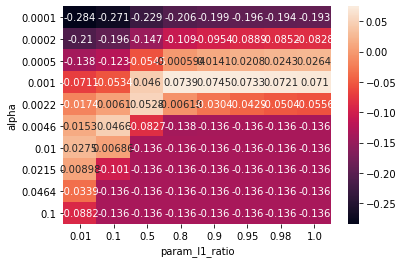

In [ ]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g")
plt.ylabel("alpha")
plt.savefig("images/elasticnet_search.png")

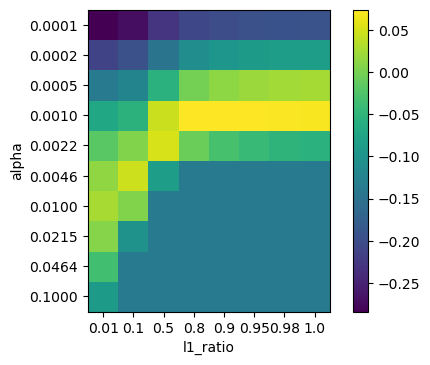

In [ ]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['alpha']
l1_ratio = np.array(param_grid['l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [ ]:
(grid.best_estimator_.coef_!= 0).sum()

10

In [ ]:
alphas.shape

(10,)

In [ ]:
param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [.98]}
print(param_grid)

grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

{'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]), 'l1_ratio': [0.98]}


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000.0, normalize=True),
             iid=False,
             param_grid={'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]),
                         'l1_ratio': [0.98]},
             return_train_score=True)

In [ ]:
(grid.best_estimator_.coef_!= 0).sum()

9